In [1]:
from zlib import crc32

import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec
import pandas as pd
import scipy.stats as st
import seaborn as sns
import itertools
from itertools import combinations

In [2]:
#Генерируем выборку
import re
EMAIL_REGEX = re.compile(r"[^@]+@phystech.edu")

def generate_dataset(code):
    rs = np.random.RandomState(code)
    alpha = rs.uniform()*10
    data = rs.randn(100, 2)
    data[:,1] = data[:, 0]
    data[:,1] += rs.randn(100)*alpha
    data[-1,0] = 99999
    return data

In [3]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
assert EMAIL_REGEX.match(task['mail']), 'Not a mail in the phystech.edu domain'
task['id'] = crc32(task['mail'].encode('utf-8'))
task['data'] = generate_dataset(task['id'])

Enter your mail: salnikov.an@phystech.edu


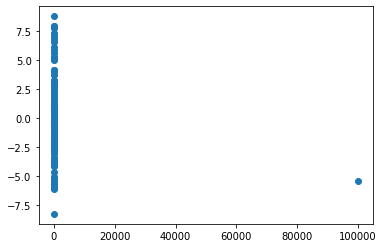

In [4]:
data = task['data']
# в формат pandas
df = pd.DataFrame(data)
#График, на нем видим выброс
plt.scatter(x = df[0], y = df[1])

In [5]:
#Существует ли линейная взаимосвязь между столбцами выборки по t-критерию Стьюдента?
print('r_pearson = {:.3f}\np_value_non_correlation = {:.3f}'.format(*st.pearsonr(df[0], df[1])))
#p_value > 0.05, гипотеза о нескореллированности не отвергается

r_pearson = -0.143
p_value_non_correlation = 0.155


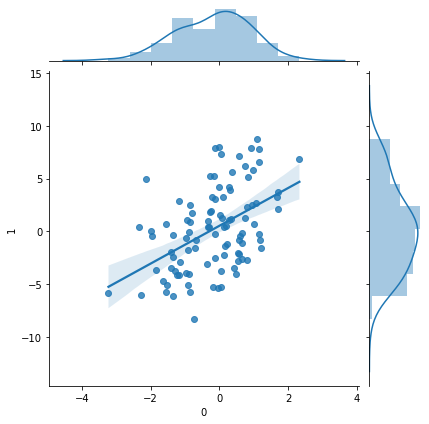

In [6]:
#Удаляем выбросы
df_new = df.drop(df[(df.abs() > df.mean() + 3 * df.std()).any(axis = 1)].index, axis = 0)
sns.jointplot(x = df_new[0], y = df_new[1], kind = 'reg')

In [7]:
#Существует ли линейная взаимосвязь между столбцами выборки по t-критерию Стьюдента, если исключить выбросы из выборки?
print('r_pearson_new = {:.3f}\np_value_non_correlation = {}'.format(*st.pearsonr(df_new[0], df_new[1])))
#p_value < 0.05, гипотеза о нескореллированности отвергается

r_pearson_new = 0.470
p_value_non_correlation = 8.973226811194023e-07


In [8]:
#Коэффициент корреляции Кендалла по исходной выборке (без удаления выбросов)
print('r_kendall = {:.3f}'.format(*st.kendalltau(df[0], df[1])))

r_kendall = 0.295
